In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

In [43]:
emissions = pd.read_csv("D:\Kuliah\BasicStats\EVEN_FinalProj\datasets\API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3159114.csv", skiprows=3)
country = pd.read_csv("D:\Kuliah\BasicStats\EVEN_FinalProj\datasets\GlobalLandTemperaturesByCountry.csv")

# processing the temperature dataset to only show Indonesia
country["dt"] = pd.to_datetime(country["dt"])
country.set_index("dt", inplace=True)
indo_temp = country.loc[country["Country"] == "Indonesia"] 
indo_temp.fillna(method="bfill", inplace=True)
indo_temp.drop("AverageTemperatureUncertainty", axis=1, inplace=True)
indo_temp = indo_temp.resample("AS").mean()
indo_temp 

# processing the CO2 emissions dataset to only show Indonesia
indo_emissions = emissions.loc[emissions["Country Name"] == "Indonesia"]
indo_emissions.drop("Unnamed: 65", axis=1, inplace=True)
# dropping the NaN values as it doesn't affect the analysis
indo_emissions.drop(["2019", "2020"], axis=1, inplace=True)

# slicing the dataframe to get usable features
indo_emissions = indo_emissions.iloc[:, 4:]
indo_emissions = indo_emissions.transpose()
indo_emissions.rename(columns={106:"CO2 emissions (metric tons per capita)"}, inplace=True)
indo_emissions.index = pd.to_datetime(indo_emissions.index)
 
# combining the two datasets together
# drop rows that don't have both features
indo_final = indo_temp.merge(indo_emissions, how='inner', left_on=indo_temp.index, right_on=indo_emissions.index)

# changing the datetime column name
indo_final.rename(columns={"key_0":"datetime"}, inplace=True)
indo_final

,datetime,AverageTemperature,CO2 emissions (metric tons per capita)
0,1960-01-01,26.029167,0.243920
1,1961-01-01,25.771667,0.288848
2,1962-01-01,25.789417,0.248553
3,1963-01-01,25.838583,0.239783
4,1964-01-01,25.835500,0.229458
5,1965-01-01,25.701750,0.246241
6,1966-01-01,25.943917,0.227084
7,1967-01-01,25.835083,0.232007
8,1968-01-01,25.951083,0.253602
9,1969-01-01,26.113083,0.298784


-328.4770498506402


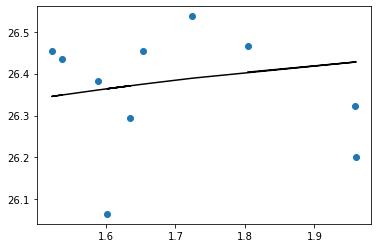

In [49]:
# splitting the dataset into training and testing
# using the last 10 years as the testing
x_train = indo_final["CO2 emissions (metric tons per capita)"].iloc[0:44].values
y_train = indo_final["AverageTemperature"].iloc[0:44].values
x_test = indo_final["CO2 emissions (metric tons per capita)"].iloc[44:].values
y_test = indo_final["AverageTemperature"].iloc[44:].values

# reshaping data to fit model
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# fitting the model
svr = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)
print(svr.score(y_test, y_pred))

# plotting
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color="black")